### Imports

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from random import random, seed
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as np
from autograd import grad, elementwise_grad
import scikitplot as skplt
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.exceptions import ConvergenceWarning

### Make design matrices from breast cancer data

In [10]:
cancer = load_breast_cancer()

#Splitting data 4/5 train and 1/5 test, so more data to train than test
X, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=0)

scaler = MinMaxScaler()
scaler.fit(X)
X= scaler.transform(X)
X_test = scaler.transform(X_test)
y = y_train.reshape(-1,1) # (455,1)

print(y.shape)
print(X.shape)
print(X_test.shape)

n = X.shape[0] # 455

# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
# print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_start = np.random.randn(X.shape[1], 1)
Niterations = 1000

(455, 1)
(455, 30)
(114, 30)


### Setting up the plots variables

In [11]:
xnew = X_test
x = np.arange(len(y_test))

### Adagrad Gradient Descent

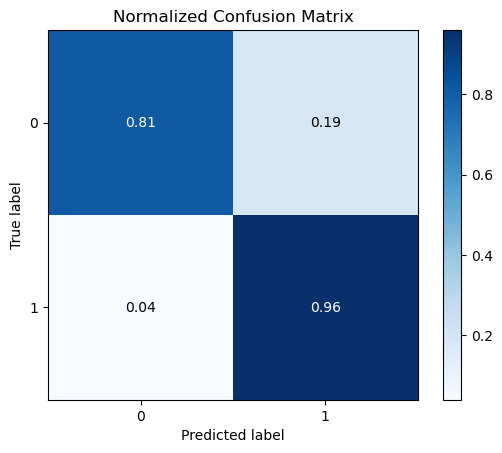

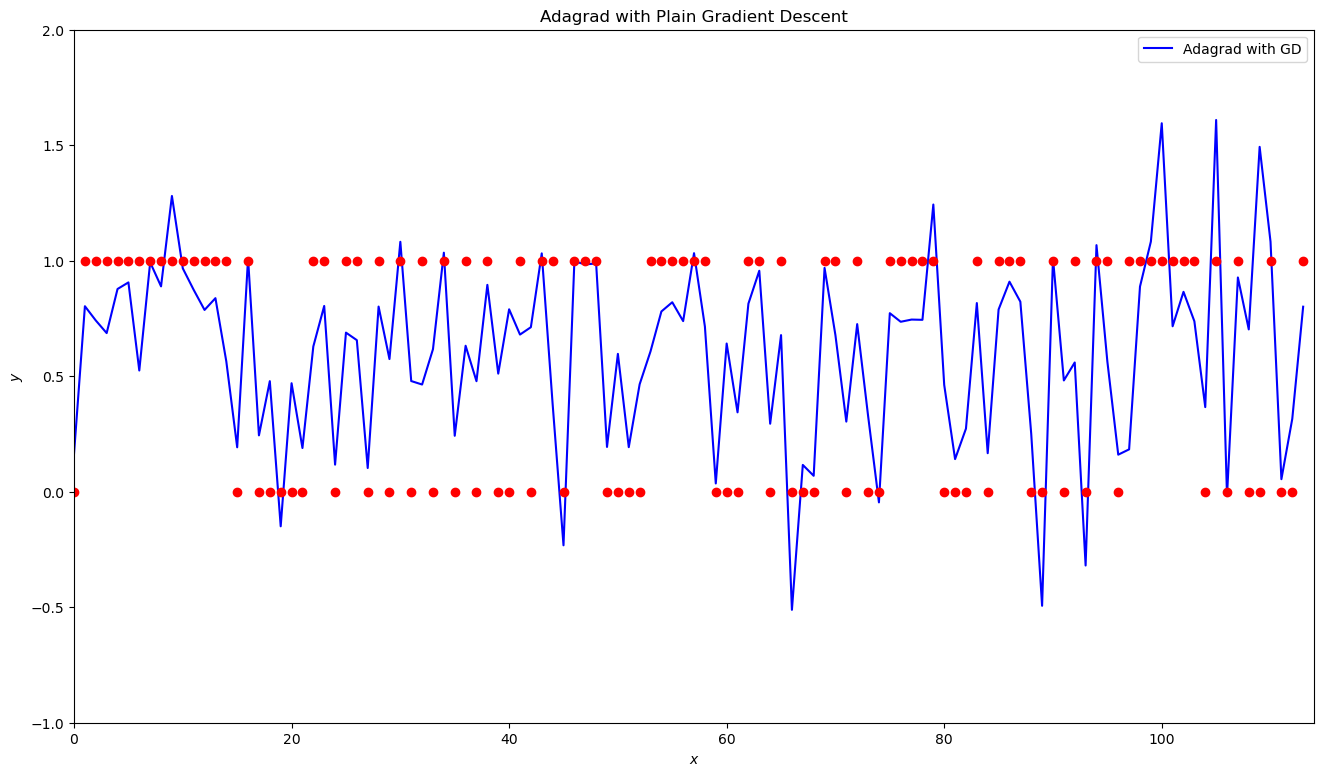

In [12]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

def CostOLS_momentum(y,X,theta):
    return np.sum((y-X @ theta)**2)

# Guess for unknown parameters beta
beta = beta_start
training_gradient = grad(CostOLS)

# Value for learning rate
eta = 1.0/np.max(EigValues)
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
Giter = 0.0

for i in range(Niterations):
    gradients = training_gradient(beta)
    Giter += gradients*gradients 
    # Scaling with rho the new and the previous results
    update = gradients*eta/(delta+np.sqrt(Giter))
    beta -= update

ypredict_adagrad_gd = xnew.dot(beta)

ypredict_adagrad_gd_binary = [1 if x >= 0.5 else 0 for x in ypredict_adagrad_gd]
skplt.metrics.plot_confusion_matrix(y_test, ypredict_adagrad_gd_binary, normalize=True)
plt.show()

plt.figure(figsize=(16,9))
plt.plot(x, ypredict_adagrad_gd, "b-", label = "Adagrad with GD")
plt.plot(x, y_test ,'ro')
# plt.plot(x, ypredict_adagrad_gd_binary, "go", label = "Adagrad with GD (binary response)")
plt.axis([0,len(X_test),-1,2])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Adagrad with Plain Gradient Descent')
plt.legend()
plt.show()

### Adagrad Gradient Descent with Momentum

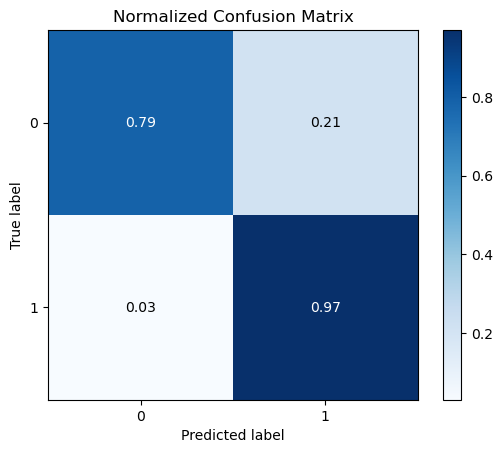

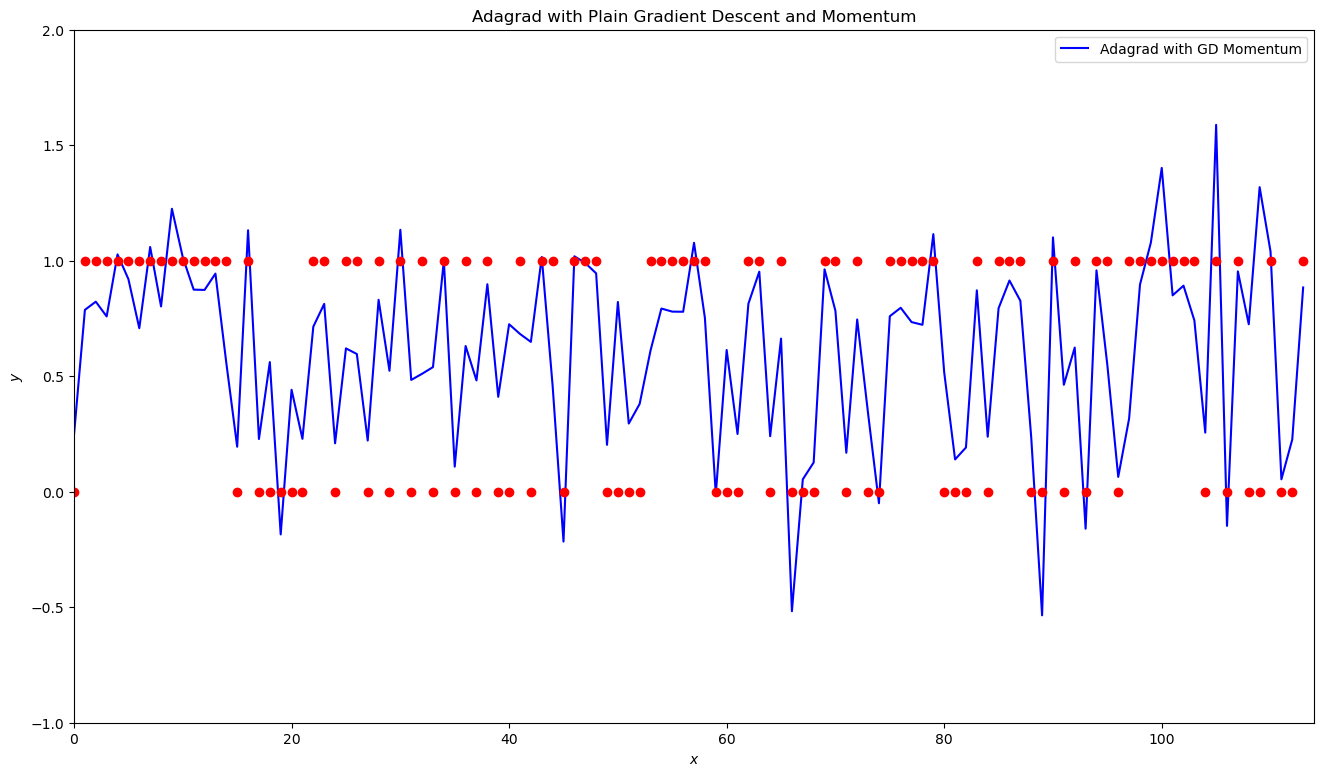

In [13]:
# Guess for unknown parameters beta
beta = beta_start
training_gradient = grad(CostOLS)

# Value for learning rate
eta = 1.0/np.max(EigValues)
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
Giter = 0.0
# Now improve with momentum gradient descent
change = 0.0
delta_momentum = 0.3

for i in range(Niterations):
    gradients = training_gradient(beta)
    Giter += gradients*gradients 
    # Scaling with rho the new and the previous results
    update = gradients*eta/(delta+np.sqrt(Giter)) + delta_momentum*change
    # Take a step
    beta -= update
    # Save the change
    change = update

ypredict_adagrad_gdm = xnew.dot(beta)

ypredict_adagrad_gdm_binary = [1 if x >= 0.5 else 0 for x in ypredict_adagrad_gdm]
skplt.metrics.plot_confusion_matrix(y_test, ypredict_adagrad_gdm_binary, normalize=True)
plt.show()

plt.figure(figsize=(16,9))
plt.plot(x, ypredict_adagrad_gdm, "b-", label = "Adagrad with GD Momentum")
plt.plot(x, y_test ,'ro')
# plt.plot(x, ypredict_adagrad_gdm_binary, "go", label = "Adagrad with GD Momentum (binary response)")
plt.axis([0,len(X_test),-1,2])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Adagrad with Plain Gradient Descent and Momentum')
plt.legend()
plt.show()

### Setting up the Stochastic variables

In [14]:
# Define parameters for Stochastic methods
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

### Adagrad Stochastic Gradient Descent

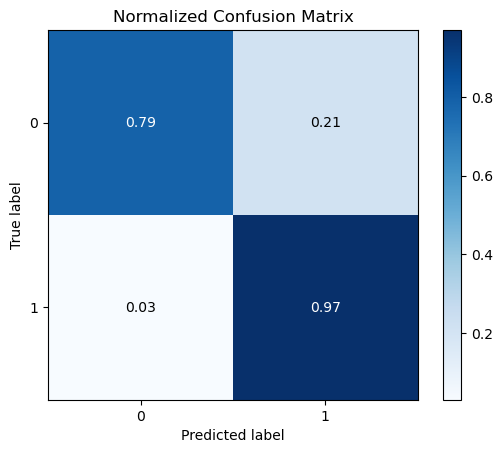

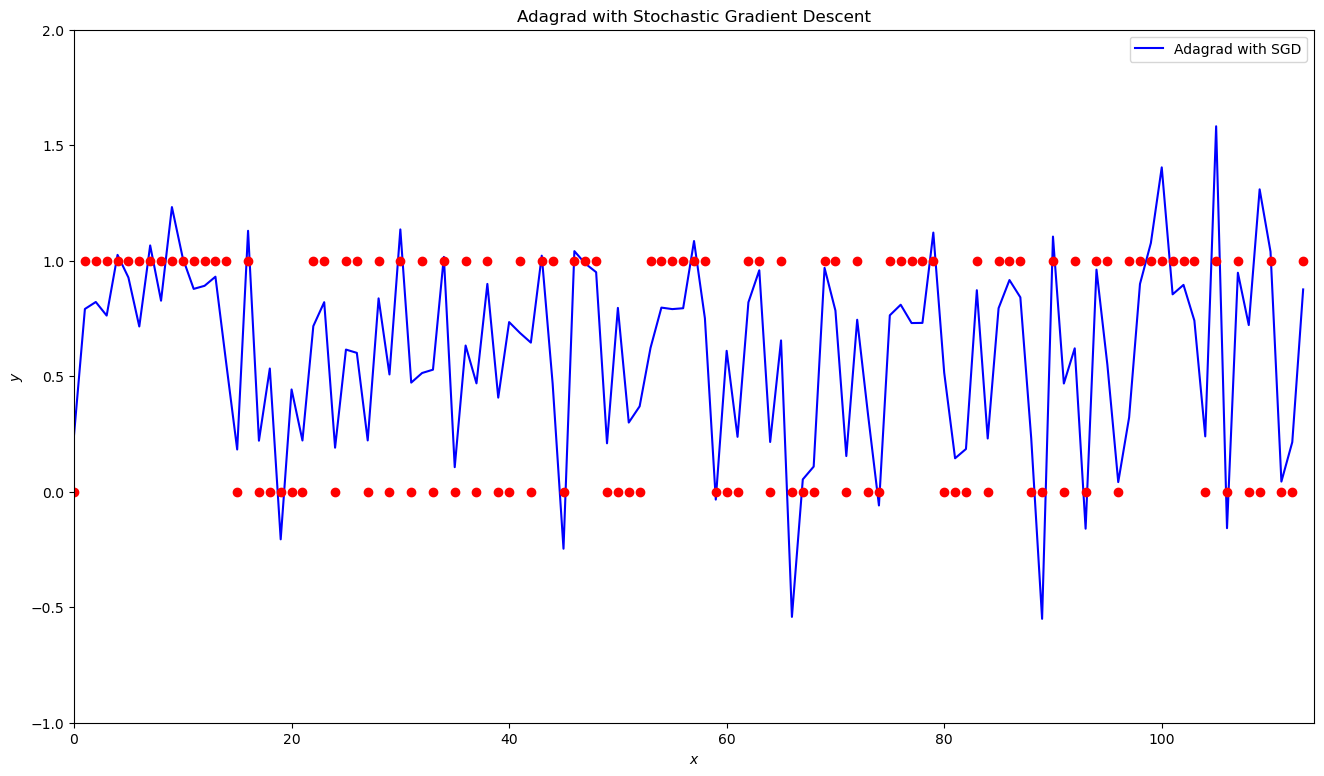

In [15]:
# Guess for unknown parameters beta
beta = beta_start
training_gradient = grad(CostOLS_momentum,2)

# Value for learning rate
eta = 1.0/np.max(EigValues) # Value for learning rate
delta  = 1e-8 # Including AdaGrad parameter to avoid possible division by zero

for epoch in range(n_epochs):
    # Notations in book
    Giter = 0.0 # r
    for i in range(m):
        random_index = M*np.random.randint(m) # Sample of mini batchs
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = training_gradient(yi,xi,beta) # g
        Giter += gradients*gradients 
        eta = learning_schedule(epoch*m+i)
        update = gradients*eta/(delta+np.sqrt(Giter)) # update
        beta -= update

ypredict_adagrad_sgd = xnew.dot(beta)

ypredict_adagrad_sgd_binary = [1 if x >= 0.5 else 0 for x in ypredict_adagrad_sgd]
skplt.metrics.plot_confusion_matrix(y_test, ypredict_adagrad_sgd_binary, normalize=True)
plt.show()

plt.figure(figsize=(16,9))
plt.plot(x, ypredict_adagrad_sgd, "b-", label = "Adagrad with SGD")
plt.plot(x, y_test ,'ro')
# plt.plot(x, ypredict_adagrad_sgd_binary, "go", label = "Adagrad with SGD (binary response)")
plt.axis([0,len(X_test),-1,2])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Adagrad with Stochastic Gradient Descent')
plt.legend()
plt.show()

### Adagrad Stochastic Gradient with Momentum

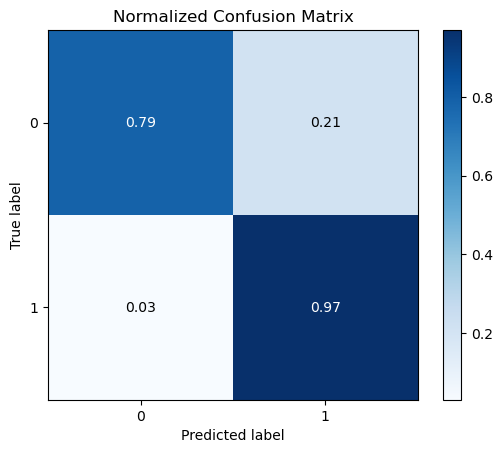

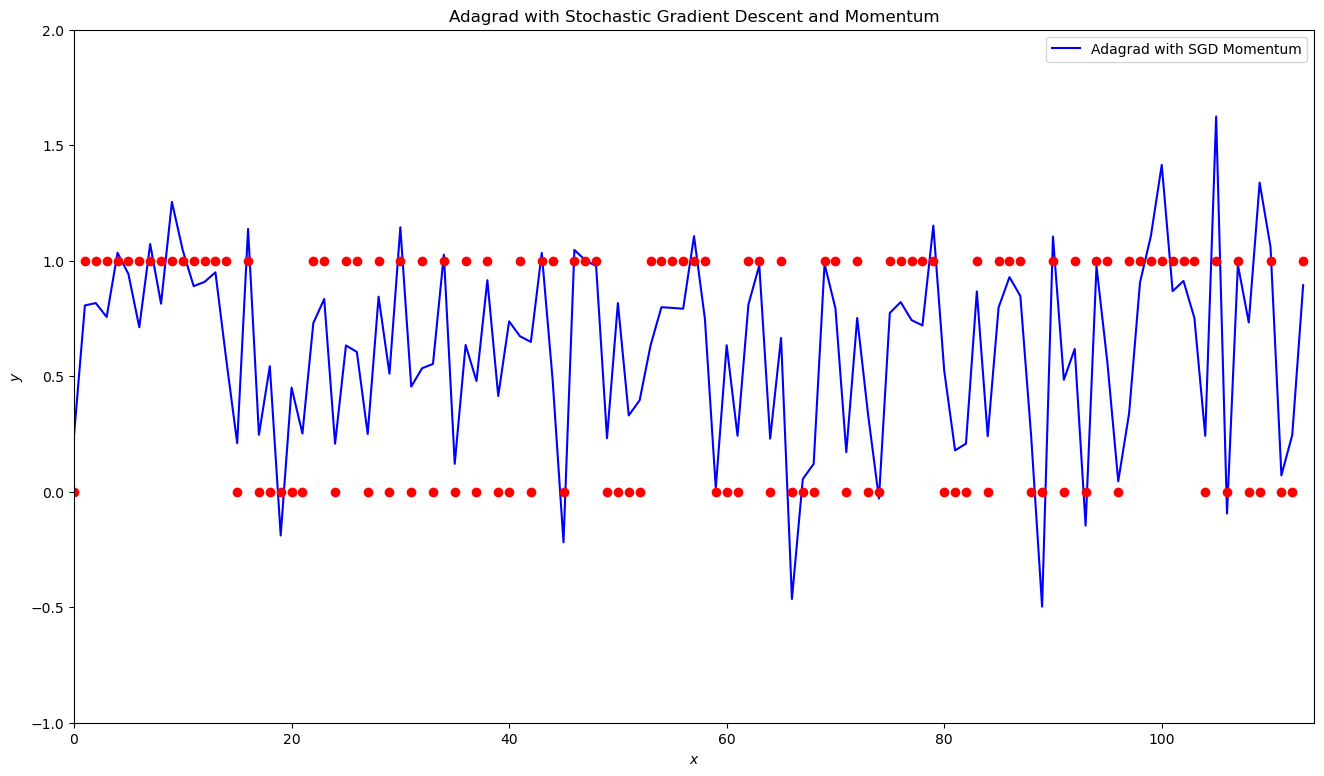

In [16]:
# Guess for unknown parameters beta
beta = beta_start
training_gradient = grad(CostOLS_momentum,2)

# Value for learning rate
eta = 1.0/np.max(EigValues) # Value for learning rate
delta  = 1e-8 # Including AdaGrad parameter to avoid possible division by zero
# Now improve with momentum gradient descent
change = 0.0
delta_momentum = 0.3

for epoch in range(n_epochs):
    # Notations in book
    Giter = 0.0 # r
    for i in range(m):
        random_index = M*np.random.randint(m) # Sample of mini batchs
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = training_gradient(yi,xi,beta) # g
        Giter += gradients*gradients 
        eta = learning_schedule(epoch*m+i)
        update = gradients*eta/(delta+np.sqrt(Giter))+delta_momentum*change # update
        beta -= update

ypredict_adagrad_sgdm = xnew.dot(beta)

ypredict_adagrad_sgdm_binary = [1 if x >= 0.5 else 0 for x in ypredict_adagrad_sgdm]
skplt.metrics.plot_confusion_matrix(y_test, ypredict_adagrad_sgdm_binary, normalize=True)
plt.show()

plt.figure(figsize=(16,9))
plt.plot(x, ypredict_adagrad_sgdm, "b-", label = "Adagrad with SGD Momentum")
plt.plot(x, y_test ,'ro')
# plt.plot(x, ypredict_adagrad_sgdm_binary, "go", label = "Adagrad with SGD Momentum (binary response)")
plt.axis([0,len(X_test),-1,2])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Adagrad with Stochastic Gradient Descent and Momentum')
plt.legend()
plt.show()